In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import sys
sys.path.append('../..')
from clusterizer.algorithms import clusterize_poisson, cluster_boolean_series
from clusterizer.cluster import Cluster
from clusterizer.circuit import MergedCircuit
from clusterizer.plot import draw_location_time_scatter, overlay_cluster
import clusterizer

Git root path found at: /home/rick/Documents/Universiteit/Wiskunde/Modellenpracticum/SCG-analyse
Using data path:        /home/rick/Documents/Universiteit/Wiskunde/Modellenpracticum/SCG-analyse/data/origineel


In [2]:
circuitnr = clusterizer.globals.available_circuits[5]
print(circuitnr)
circuit = MergedCircuit(circuitnr)
circuit.build()
#circuit.pd

2063


In [3]:
#draw_location_time_scatter(circuit)

In [3]:
clusters, bins, bin_contents, rate = clusterize_poisson(circuit)
for cluster in clusters:
    print(cluster)

492m to 544m
328m to 364m
256m to 288m
576m to 628m
0m to 12m


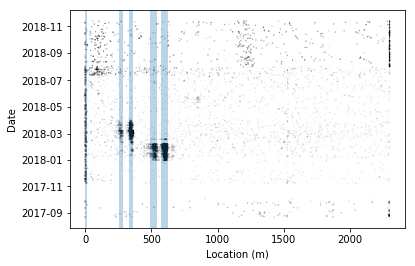

In [5]:
draw_location_time_scatter(circuit, dot_size_to_charge_ratio=1e6)
for cluster in clusters:
    overlay_cluster(cluster)

In [11]:
def bin_times(partial_discharges, bin_size):
    """
    Create a histogram of partial discharges in the time dimension
    """
    time_column = partial_discharges.columns[0]
    convert_times = lambda s: datetime.datetime.strptime(str(s), "%Y-%m-%d %H:%M:%S")
    cluster_times = partial_discharges[time_column].apply(convert_times)
    start_time = cluster_times[cluster_times.index[0]]
    stop_time = cluster_times[cluster_times.index[-1]]
    bins = np.arange(start = start_time, stop = stop_time, step = bin_size)
    binned_pds, _ = np.histogram(cluster_times, bins=bins)
    return binned_pds, bins

def pds_in_cluster(partial_discharges, cluster):
    xmin = cluster.location_range[0]
    xmax = cluster.location_range[1]
        
    location_column = partial_discharges.columns[1]
    in_cluster = [xmin <= loc <= xmax for loc in partial_discharges[location_column]]
    cluster_pds = partial_discharges[in_cluster]
    return cluster_pds
    
def time_clustering(circuit, clusters, bin_size = datetime.timedelta(days=1), rate=0):
    time_column, location_column, charge_column = circuit.pd.columns
    pardis = circuit.pd[circuit.pd_occured]
    
    result = []
    
    for cluster in clusters:
        cluster_pds = pds_in_cluster(pardis, cluster)
        
        binned_pds, bins = bin_times(cluster_pds, bin_size)
        average = np.mean(binned_pds)
        print(str(cluster) + ": " + str(average))
        print(binned_pds)
        if rate == 0:
            rate = average
        boolean_pds_fault = binned_pds > rate
        index_time_cluster_edges = cluster_boolean_series(boolean_pds_fault)
        for index_time_cluster in index_time_cluster_edges:
            tmin = bins[index_time_cluster[0]]
            tmax = bins[index_time_cluster[1]]
            location_time_cluster = Cluster(location_range=cluster.location_range, time_range=(tmin, tmax))
            result.append(location_time_cluster)
    return result

In [11]:
time_clusters = time_clustering(circuit, clusters, rate=rate)
for cluster in time_clusters:
    print(cluster)

576m to 628m: 18.0625
[  1   1   0   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   2   0   1   0   0   0   4  52  32
  16  49  13  34  66  54 132 102  86  74  94 123 144 143 106   5  69  53
  44 111 117 116 234 246  85 415 421 399 422 369 221 278 296 260 446 600
   0   5   0   0   0   0   0   0   1   0  33   0   0   0   0   1   0   1
   1   0   0   0   1   1   0   1   0   0   0   0   0   1   0   1   0   0
   0   0   0   0   0   0   0   0   0   0   1   1   0   0   1   1   1   0
   0   2   0   0   0   0   0   0   0   0   0   1   0   0   2   0   0   0
   0   0   0   0   0   0   1   1   1   1   2   0   0   0   0   0   0   1
   0   1   0   1   0   0   1   0   0   0   0   0   0   1   1   0   0   0
   0   1   1   1   0   1   3   0   0   0   0   0   0   0   0   0   0   0
   0   0   2   1   0   1   0   0   0   0   0   0   0   0   0   1   1   0
   1   0   0   0   1   1   0 

0m to 2000m: 29.868303571428573
[  5   5   1   6   2   2   2   4   0   2   3   4   4   2   1   1   3   0
   0   0   1   4   5   1   0   0   0   1   6   1   4   3   4   1   4   4
   2   7   1   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  11  16   9   9  10   2   5  14  11   7  21  17   9
   4   6   4   7  10  11   6   2   5   3   1   8   8   3  13  10   6   7
   8   0   2   4   3   0   0   0   4   2   2   3   9   0   4   5   1   6
   8   1   8  13  92  20  39  55   4  61  74 114 165 140 122  99 160 175
 173 179  87  47  94  53  88 139 181 188 263 251 221 468 484 472 410 503
 186 350 378 303 533 525   0  14  33  57  39   4  22  24  23  18  75  28
  43  48  39  41  69  63  83  67  42  48 113 104 191  95  63 167 238 229
 148  65  24  65  47  27  58  69  28  22  35  71 115  56  43  36  30  49
  32  22  16  34  17   6  13  16   4   2   8  10   8   7   7   4   6   4
  11   6   5   6   

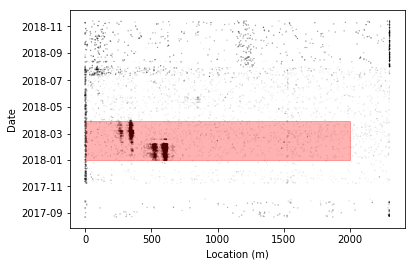

In [12]:
entire_time_clusters = time_clustering(circuit, [Cluster(location_range=(0,2000))])
draw_location_time_scatter(circuit, dot_size_to_charge_ratio=1e6)
for cluster in entire_time_clusters:
    overlay_cluster(cluster, color='r')

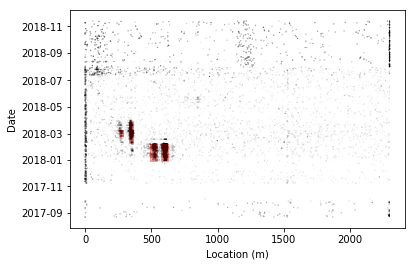

In [13]:
draw_location_time_scatter(circuit, dot_size_to_charge_ratio=1e6)
for cluster in time_clusters:
    overlay_cluster(cluster, color='r')

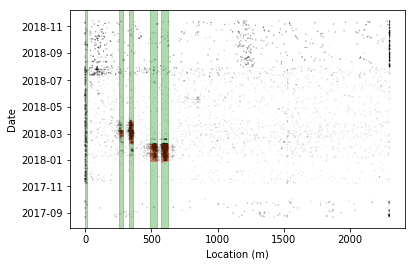

In [14]:
draw_location_time_scatter(circuit, dot_size_to_charge_ratio=1e6)
for cluster in clusters:
    overlay_cluster(cluster, color='g')
for cluster in time_clusters:
    overlay_cluster(cluster, color='r')

# Een aantal plot dingen

Histogram in de tijd-dimensie en een algemenere functie waarbij je ook kan zeggen dat je de histogram gesorteerd wil hebben naar aantal pds per bakje.

In [17]:
def draw_time_hist(circuit, partial_discharges=None, weigh_charges=False, ax=None, bins=None, color='black'):
    if ax is None:
        ax = plt.gca()
    if partial_discharges is None:
        partial_discharges = circuit.pd[circuit.pd_occured]
    time_column, location_column, charge_column = circuit.pd.columns
    convert_times = lambda s: datetime.datetime.strptime(str(s), "%Y-%m-%d %H:%M:%S")
    times = partial_discharges[time_column].apply(convert_times)
    if bins is None: 
        start_time = times[times.index[0]]
        stop_time = times[times.index[-1]]
        bins = np.arange(start = start_time, stop = stop_time, step = datetime.timedelta(days=1))
    hist_weights = None
    if weigh_charges:
        hist_weights = partial_discharges[charge_column]
    
    counts, _, _ = ax.hist(times, weights=hist_weights, bins=len(bins), color=color)
    ax.set_title("Circuit {0}".format(circuit.circuitnr))
    ax.set_xlabel("Time")
    ax.set_ylabel("Number of PDs")
    

def draw_bar_graph(circuit, partial_discharges=None, weigh_charges=False, ax=None, bins=None, sort_hist=False, color='black'):
    if ax is None:
        ax = plt.gca()
    if partial_discharges is None:
        partial_discharges = circuit.pd[circuit.pd_occured]
    time_column, location_column, charge_column = circuit.pd.columns
    convert_times = lambda s: datetime.datetime.strptime(str(s), "%Y-%m-%d %H:%M:%S")
    times = partial_discharges[time_column].apply(convert_times)
    if bins is None: 
        start_time = times[times.index[0]]
        stop_time = times[times.index[-1]]
        bins = np.arange(start = start_time, stop = stop_time, step = datetime.timedelta(days=1))
    hist_weights = None
    if weigh_charges:
        hist_weights = partial_discharges[charge_column]
        
    hist, bins = np.histogram(times, bins, weights=hist_weights)
    width = 1
        
    if sort_hist:
        hist = sorted(hist)
        center = np.arange(0, 100, 100/len(hist))
        ax.bar(center, hist, align='center', width=width, color=color)
        ax.set_xlabel("Percentage of bins")
    else:
        bins_conv = np.array(list(map(convert_times, list(map(pd.Timestamp, bins)))))
        delta = (bins[:-1] - bins[1:])/2
        center = bins[1:] + delta
        ax.bar(center, hist, align='center', width=width, color=color)
        ax.set_xlabel("Time")
    ax.set_title("Circuit {0}, from {1} meter to {2} meter".format(circuit.circuitnr, round(partial_discharges[location_column][partial_discharges.index[0]], 1), round(partial_discharges[location_column][partial_discharges.index[-1]], 1)))
    ax.set_ylabel("Number of PDs")

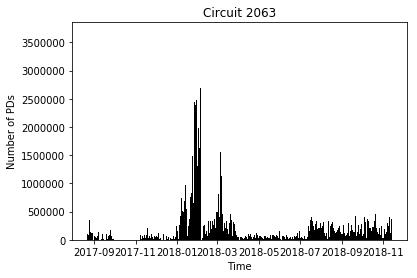

In [73]:
draw_time_hist(circuit)

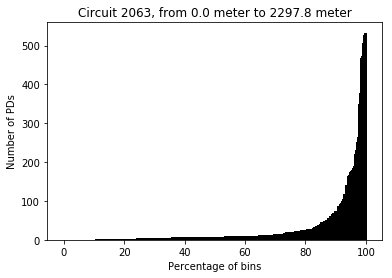

In [82]:
draw_bar_graph(circuit, sort_hist=True)

576m to 628m


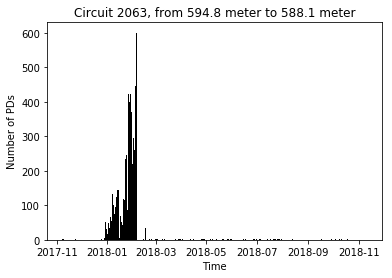

In [12]:
cluster_list = list(clusters)
cur_clust = cluster_list[3]
print(cur_clust)
cluster_pds = pds_in_cluster(circuit.pd, cur_clust)

draw_time_hist(circuit, partial_discharges=cluster_pds)

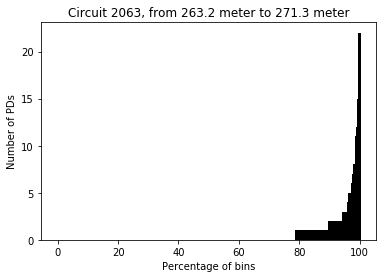

In [70]:
draw_bar_graph(circuit, partial_discharges=cluster_pds, sort_hist=True)

In [41]:
def calculate_average(circuit, cluster=None, bin_size=datetime.timedelta(days=1)):
    partial_discharges = circuit.pd
    time_column = partial_discharges.columns[0]
    if cluster is not None:
        partial_discharges = pds_in_cluster(partial_discharges, cluster)
    
    binned_pds, bins = bin_times(partial_discharges, bin_size)
    average = np.mean(binned_pds)
    return average

def overlay_horizontal_line(height, xmin=0, xmax=100, ax=None, color='b'):
    if ax is None:
        ax = plt.gca()
    ax.hlines(y=height, xmin=xmin, xmax=xmax, color=color)

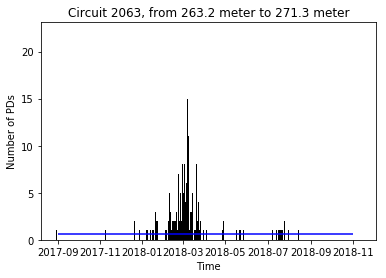

In [72]:
draw_bar_graph(circuit, partial_discharges=cluster_pds)
average = calculate_average(circuit, cluster=cur_clust)
overlay_horizontal_line(average, xmin=datetime.datetime(year=2017, month=9, day=1), xmax=datetime.datetime(year=2018, month=11, day=1))

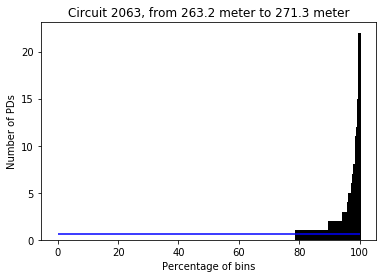

In [83]:
draw_bar_graph(circuit, partial_discharges=cluster_pds, sort_hist=True)

overlay_horizontal_line(average)

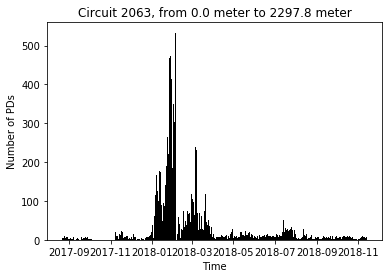

In [15]:
clusterizer.plot.draw_time_hist(circuit)

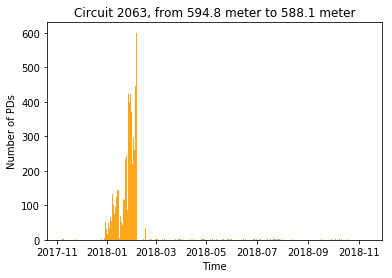

In [16]:
clusterizer.plot.draw_time_hist(circuit, partial_discharges=cluster_pds, color='#FFA71A')